In [3]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import os

fs, signal = wav.read('../../data/audio/filter/155_24_64218852.wav')

In [4]:
fs, signal

(44100, array([-113,  -90,  -71, ..., -502, -465, -393], dtype=int16))

In [5]:
# Example of pre-emphasizing.
signal_preemphasized = speechpy.processing.preemphasis(signal, cof=0.98)

# Example of staching frames
frames = speechpy.processing.stack_frames(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01, filter=lambda x: np.ones((x,)),
         zero_padding=True)

# Example of extracting power spectrum
power_spectrum = speechpy.processing.power_spectrum(frames, fft_points=512)
print('power spectrum shape=', power_spectrum.shape)

############# Extract MFCC features #############
mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
mfcc_cmvn = speechpy.processing.cmvnw(mfcc,win_size=301,variance_normalization=True)
print('mfcc(mean + variance normalized) feature shape=', mfcc_cmvn.shape)

mfcc_feature_cube = speechpy.feature.extract_derivative_feature(mfcc)
print('mfcc feature cube shape=', mfcc_feature_cube.shape)

############# Extract logenergy features #############
logenergy = speechpy.feature.lmfe(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)
print('logenergy features=', logenergy.shape)

2802 1236480 882 441.0
power spectrum shape= (2802, 257)
mfcc(mean + variance normalized) feature shape= (2801, 13)
mfcc feature cube shape= (2801, 13, 3)
logenergy features= (2801, 40)


In [7]:
mfcc

array([[16.96782284, 11.0832097 ,  0.43351866, ..., -1.58792973,
         1.39813742,  0.5399345 ],
       [17.8324205 , 12.22673783,  3.76530171, ..., -0.42159263,
         0.7862484 , -1.13131617],
       [19.31852331,  5.81428779,  0.26588988, ..., -1.08272627,
         1.48252102,  0.46650345],
       ...,
       [17.99222439, 15.18474429,  1.40877617, ...,  0.32779398,
         1.57913928,  0.02050319],
       [18.21855211, 14.8114847 ,  4.96949247, ..., -1.21047899,
         0.66252077,  0.53159245],
       [17.62843899, 12.89251364,  2.79028207, ..., -1.08577132,
        -0.11262326, -0.63983014]])

In [8]:
mfcc_cmvn

array([[-0.69337547,  0.48637685, -0.08097367, ..., -1.9100045 ,
         0.5702445 ,  0.16852787],
       [ 0.07216361,  1.0358703 ,  1.345979  , ..., -0.84478617,
        -0.02853241, -1.5835936 ],
       [ 1.3763192 , -2.0510542 , -0.15847383, ..., -1.4399158 ,
         0.6595403 ,  0.10076891],
       ...,
       [ 0.22441691,  1.7647305 , -0.64135116, ...,  0.63505316,
         0.8620717 , -0.15798557],
       [ 0.5413205 ,  1.5664072 ,  1.949991  , ..., -0.91723365,
        -0.0734272 ,  0.36702216],
       [-0.28701472,  0.5653001 ,  0.35676548, ..., -0.7923051 ,
        -0.86925524, -0.83804727]], dtype=float32)

In [40]:
import librosa
import librosa.display
audio_path = '../../data/audio/filter/155_24_64218852.wav'
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=13)
print(mfccs.shape)

C:\Users\manue\AppData\Local\Temp\ipykernel_26112\3095664982.py:5: FutureWarning: Pass y=[-113  -90  -71 ... -502 -465 -393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=fs,n_mfcc=13)


ParameterError: Audio data must be floating-point

In [49]:
mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
mfcc_cmvn = speechpy.processing.cmvnw(mfcc,win_size=301,variance_normalization=True)
print('mfcc(mean + variance normalized) feature shape=', mfcc_cmvn.shape)

mfcc(mean + variance normalized) feature shape= (2801, 13)


In [23]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)
ttt = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=13)

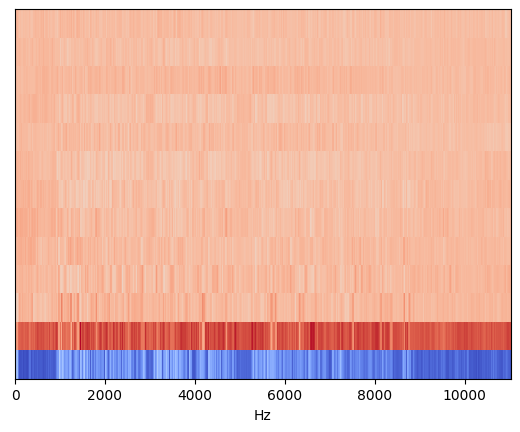

In [31]:
librosa.display.specshow(ttt, sr=sr, x_axis='hz')

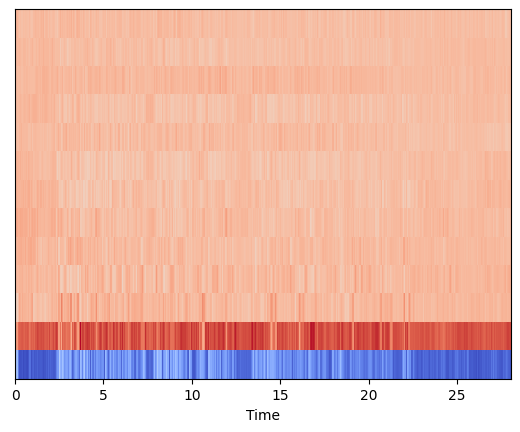

In [24]:
librosa.display.specshow(ttt, sr=sr, x_axis='time')

In [25]:
mfccs

array([[-313.46017  , -185.8652   , -162.48506  , ..., -328.8278   ,
        -333.77814  , -339.22787  ],
       [ 100.05669  ,   85.99548  ,   78.99087  , ...,  147.38199  ,
         148.39723  ,  142.62326  ],
       [  -4.398257 ,  -28.07472  ,  -42.9899   , ...,    9.178947 ,
          10.509001 ,   13.110743 ],
       ...,
       [  -9.57943  ,  -13.788278 ,  -11.6821995, ...,   -5.7032638,
          -3.2067308,    1.5452424],
       [   6.595008 ,    7.041045 ,    9.539554 , ...,    5.389056 ,
           3.4686835,    5.4087505],
       [  -9.004377 ,   -9.206229 ,   -8.159227 , ...,   -5.825703 ,
          -5.799919 ,   -0.6265017]], dtype=float32)

In [26]:
ttt

array([[-296.28595   , -166.50684   , -142.40794   , ..., -307.08545   ,
        -312.70102   , -318.5697    ],
       [  86.951485  ,   66.97914   ,   57.778847  , ...,  136.2987    ,
         137.78656   ,  132.6702    ],
       [  -2.0807467 ,  -22.60164   ,  -36.594276  , ...,    7.023328  ,
           7.484547  ,   11.107627  ],
       ...,
       [  -0.66971064,   -3.2547975 ,   -0.61928576, ...,    3.0254624 ,
           1.2454438 ,    3.3066497 ],
       [  -1.5950152 ,    2.8752549 ,    4.1812468 , ...,   -5.0085497 ,
          -5.121188  ,    1.2909108 ],
       [  -3.875665  ,    5.966383  ,    9.983909  , ...,   -1.813876  ,
          -4.9738913 ,   -2.7196522 ]], dtype=float32)

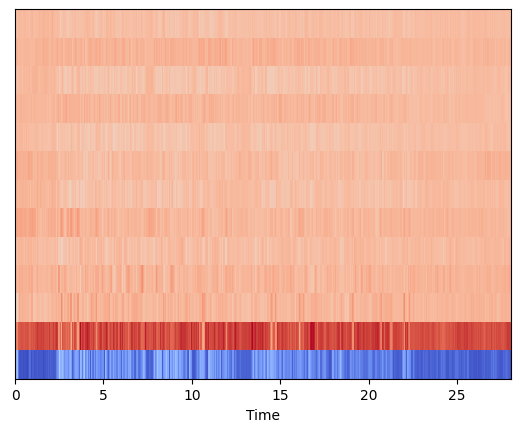

In [55]:
librosa.display.specshow(np.transpose(np.transpose(mfccs)), sr=sr, x_axis='time')

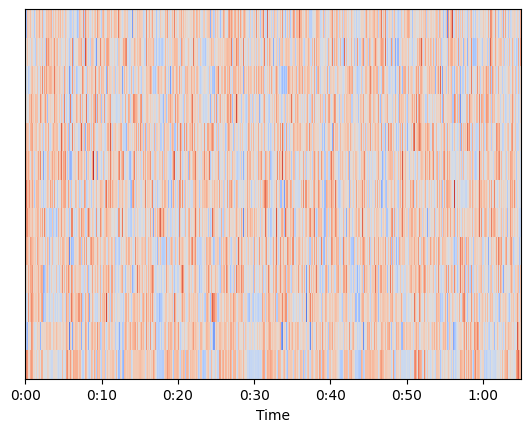

In [52]:
librosa.display.specshow(np.transpose(mfcc_cmvn), sr=sr, x_axis='time')

In [53]:
mfcc_cmvn

array([[-0.69337547,  0.48637685, -0.08097367, ..., -1.9100045 ,
         0.5702445 ,  0.16852787],
       [ 0.07216361,  1.0358703 ,  1.345979  , ..., -0.84478617,
        -0.02853241, -1.5835936 ],
       [ 1.3763192 , -2.0510542 , -0.15847383, ..., -1.4399158 ,
         0.6595403 ,  0.10076891],
       ...,
       [ 0.22441691,  1.7647305 , -0.64135116, ...,  0.63505316,
         0.8620717 , -0.15798557],
       [ 0.5413205 ,  1.5664072 ,  1.949991  , ..., -0.91723365,
        -0.0734272 ,  0.36702216],
       [-0.28701472,  0.5653001 ,  0.35676548, ..., -0.7923051 ,
        -0.86925524, -0.83804727]], dtype=float32)

In [47]:
np.transpose(mfcc)

array([[-3.68469528, -2.42822723, -1.06231286, ..., -2.94550568,
        -2.96466622, -3.2364469 ],
       [10.17147098,  5.15793379,  2.05474617, ..., 12.23596033,
        10.31630743, 11.40624807],
       [ 0.32959437, -0.05610699, -2.93030779, ...,  1.17963575,
         0.14206657, -0.01249233],
       ...,
       [-0.22236541,  0.9147078 ,  1.33474153, ..., -0.27239717,
         0.06215188, -0.16262652],
       [-0.24965529, -0.2943352 ,  0.13920229, ...,  0.46744938,
         0.57060282,  0.50485516],
       [ 1.31720609,  1.27147547,  0.40216706, ...,  0.53446884,
         0.3672365 ,  0.90321908]])

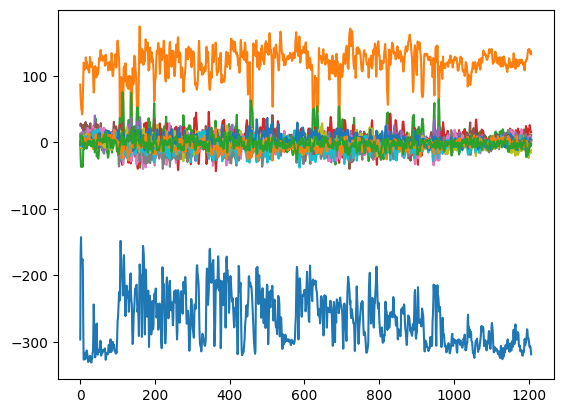

In [59]:
import matplotlib.pyplot as plt

plt.plot(np.transpose(ttt))
plt.show()